<h1> <center>Transcriptome Validation Project</center></h1> 

#### Authors: Sudha GC Upadhaya & David Linnard Wheeler     

# Objectives

- Validate the differences in gene experssion between symptomatic vs asymptomatic hosts
- Validate the differences in gene experssion of *Verticillium dahliae* isolates between symptomatic vs asymtomatic hosts

# Experimental design

- Treatment structure: 2 way factorial
- Independent variables: 
  - Two Hosts
    * Potato: cv. 'Russet Burbank'
    * Brown mustard: cv. 'ISCI 99'
  - Three Fungi
    - *𝑉𝑒𝑟𝑡𝑖𝑐𝑖𝑙𝑙𝑖𝑢𝑚 𝑑𝑎ℎ𝑙𝑖𝑎𝑒*-653 (Virulent in potato and avirulent in mint)
    - *𝑉𝑒𝑟𝑡𝑖𝑐𝑖𝑙𝑙𝑖𝑢𝑚 𝑑𝑎ℎ𝑙𝑖𝑎𝑒*-111 (Virulent in mint and avirulent in potato)
    -  Non-inoculated control (Water only)
       
- Sample collection: 10 days after inoculation
- Three replicates
- Design structure: Randomized complete Block Design 
- Observational unit: plant
- Experimental unit: plant
- Samples: whole plants
- Data
    - RNA quantity
    - Fold change
- Analysis: 
   - delta-delta ct method
   - correlation

# Material and Methods

  **Greenhouse trial**
* Inoculum preparation for root dips (3.5"pot):
 * Inoculum for isolates 653 and 111:
   * 60 plants/3 isolates = 20 plants/isolate 
   * 100 ml/plant (Dung et al. 2010) = 2000 ml = 2 L inoculum/isolate
   * 2 L of 10 conidia/ml inoculum is needed per isolate
   * 2 L/200 ml/flask = 10 flasks/isolate 
* Trial planting date: 8/21/2020
* Trial inoculation date: 9/2/2020 
* Sample collection date : 9/12/2020 potato and mustards harvest @ 10 dpi


# Gene expression validation


* RNA extraction: Crude method (Kumar et al. 2007)
* RNA quantification: QUBIT Flurometer
* RNA integrity check: Gel electorophoresis
* cDNA synthesis: VWR cDNA supermix
   * 6 µl of ~1µg total RNA + 4 µl supermix + 10 µl water
   * Incubate: 5 min at 25°C +30 min at 42°C + 5 min at 85°C and hold at 4°C
   * Dilute cDNA to 1/5th
   * Store at -20°C
* Primer design: 
   * 19 to 23 bp
   * Product size: 70 to 210 bp
   * GC content: 35% to 65%
   * Spanning exon-exon junction (if applicable)
* RTPCR
  * Reaction mixture (10µl): 
     * SYBR Select Mix(2X): 5µl
     * Forward primer (10µM): 0.5µl
     * Reverse primer (10µM): 0.5µl
     * H20: 3µl
     * cDNA template: 1µl

  * RT-PCR cycling condition:
     * Initial denaturation 95°C for 10 min
     * 40 cycles   95°C for 15 sec;
     * 40 cycles   62°C for 1 min; 
     * Followed by 60 cycles of temperature increasing from 60°C to 95°C with fluorescence readings     acquired at 0.5°C 
        increment per cycle. 
   * Internal control: Housekeeping gene for normalization
   * Negative control: No template
   * Three technical replications
   * Three biological replications
   * Check melting curve for the presence of single amplified product
* Calculate Ct values for samples using LinRegPCR software
* Calculate primer efficiency using LinRegPCR (Ruijter et al. 2009)
* Calculate log2foldchange using delta-delat Ct methond (Livak et al. 2001)
   * $∆∆Ct = ∆Ct (Treatment) – ∆Ct (Control)$
   * $Fold change = 2^-(∆∆Ct)$

# Data Analysis

In [2]:
getwd()#get working directory

[1] "C:/Users/upadhaya/Desktop/RNA-seq/qPCR validation"

In [ ]:
library(dplyr)
library(ggplot2)
library(ggthemes)
library(tidyr)
library(RColorBrewer)

In [9]:
df<- read.csv('qpcr.csv')

In [ ]:
summary(df)

In [6]:
head(df)

ID,Host,Gene,comparision,Replication,qPCR,RNASeq
St-1,Solanum tuberosum,St_PR04_SOLLC-1,653 vs control,1,1.30,2.4
St-1,Solanum tuberosum,St_PR04_SOLLC-1,653 vs control,2,0.79,2.4
St-1,Solanum tuberosum,St_PR04_SOLLC-1,653 vs control,3,1.45,2.4
St-1,Solanum tuberosum,St_PR04_SOLLC-2,111 vs 653,1,-1.67,-2.4
St-1,Solanum tuberosum,St_PR04_SOLLC-2,111 vs 653,2,-1.83,-2.4
St-1,Solanum tuberosum,St_PR04_SOLLC-2,111 vs 653,3,-2.88,-2.4


In [10]:
str(df)

'data.frame':	81 obs. of  7 variables:
 $ ID         : Factor w/ 19 levels "Bj-10","Bj-11",..: 7 7 7 7 7 7 10 10 10 10 ...
 $ Host       : Factor w/ 3 levels "Brassica juncea",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Gene       : Factor w/ 27 levels "Bj_Cluster-15354.125147",..: 19 19 19 20 20 20 12 12 12 13 ...
 $ comparision: Factor w/ 6 levels "111 vs 653","111 vs control",..: 3 3 3 1 1 1 3 3 3 2 ...
 $ Replication: int  1 2 3 1 2 3 1 2 3 1 ...
 $ qPCR       : Factor w/ 75 levels "-0.34","-0.48",..: 53 50 54 20 23 41 24 5 13 6 ...
 $ RNASeq     : num  2.4 2.4 2.4 -2.4 -2.4 -2.4 -2.9 -2.9 -2.9 -2.9 ...


In [ ]:
df$Replication <- as.factor(df$Replication)#change numeric data to factor
df$qPCR <- as.numeric(as.character(df$qPCR))#change factor to numeric

In [13]:
df[!complete.cases(df),]# find data with NA 
df<- df[!is.na(df$qPCR),]#subset data excluding NAs

,ID,Host,Gene,comparision,Replication,qPCR,RNASeq
34,St-11,Solanum tuberosum,St_TIF5A_ARATH,111 vs 653,1,NA,1.8
79,Bj-2,Brassica juncea,Bj_Cluster-15354.125147,653 vs control,1,NA,-5.7
81,Bj-2,Brassica juncea,Bj_Cluster-15354.125147,653 vs control,3,NA,-5.7


In [15]:
df1<- gather(df, method, foldchange, qPCR:RNASeq)

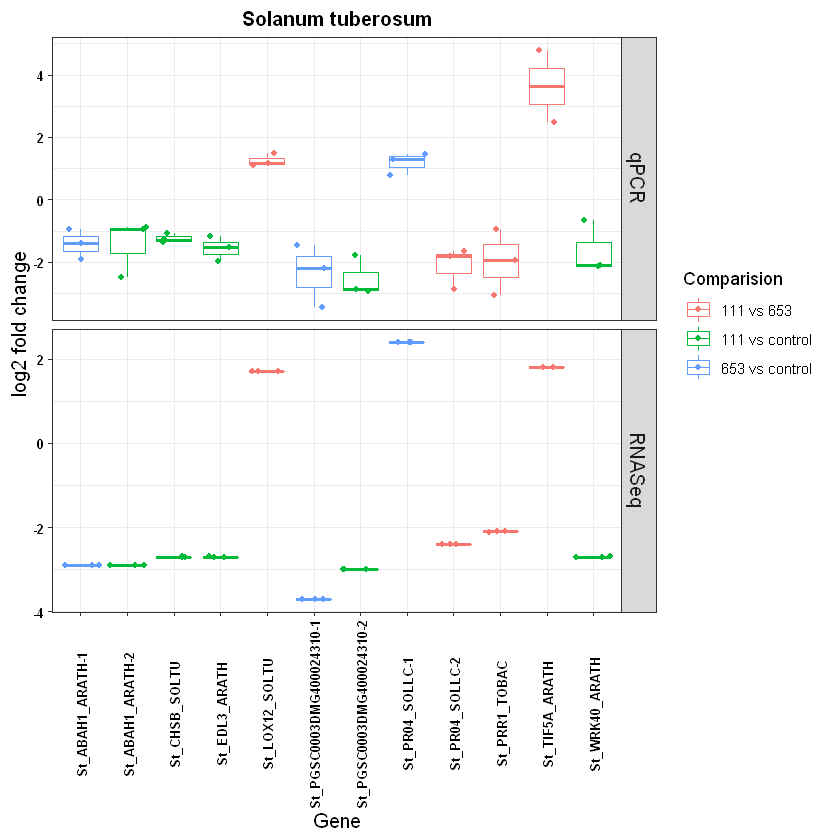

In [16]:
df_St<- subset(df1, Host == 'Solanum tuberosum')
#pdf('Solanum.pdf')
Solanum = ggplot(df_St, aes(x= Gene, y= foldchange, colour = comparision))+
       geom_boxplot()+
       geom_jitter(size =2,pch=20)+
       theme_bw()+
       facet_grid(method~., scales ='free')+
       labs(title ='Solanum tuberosum', x = 'Gene', y = 'log2 fold change')+
       theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          plot.caption = element_text(size =10),
          axis.title.x= element_text(size =12, color ='black'),
          axis.title.y = element_text(size =12, color ='black'),
          axis.text.x = element_text(vjust =0.5, size =8,angle =90,color = 'black', face='bold'),
          axis.text.y = element_text(size =8, color = 'black', face ='bold'),
           strip.text = element_text(size = 12))+
          guides(color = guide_legend('Comparision'))
Solanum
#dev.off()

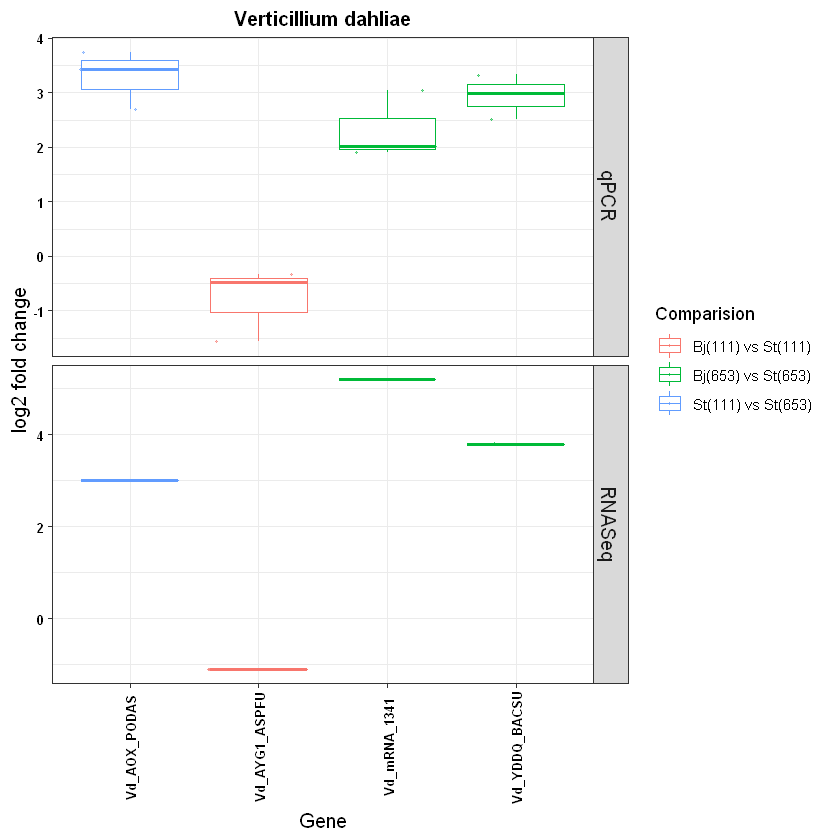

In [17]:
df_Vd<- subset(df1, Host == 'Verticillium dahliae')
#png('Verticillium.png')
Verticillium = ggplot(df_Vd, aes(x= Gene, y= foldchange, colour = comparision))+
       geom_boxplot()+
       geom_jitter(size =1,, alpha = 0.5, pch=20)+
       theme_bw()+
       facet_grid(method~., scales ='free')+
       labs(title ='Verticillium dahliae', x = 'Gene', y = 'log2 fold change')+
       theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          plot.caption = element_text(size =10),
          axis.title.x= element_text(size =12, color ='black'),
          axis.title.y = element_text(size =12, color ='black'),
          axis.text.x = element_text(vjust =0.5, size =8,angle =90,color = 'black', face='bold'),
          axis.text.y = element_text(size =8, color = 'black', face ='bold'),
           strip.text = element_text(size = 12))+
          guides(color = guide_legend('Comparision'))
Verticillium
#dev.off()

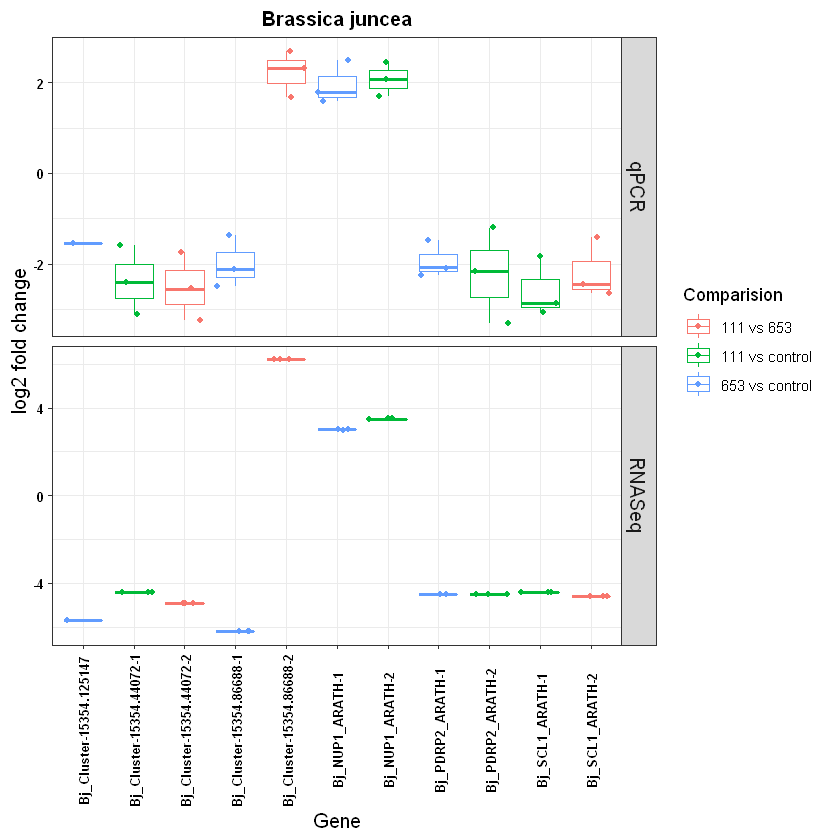

In [18]:
df_Bj<- subset(df1, Host == 'Brassica juncea')
#tiff('Brassica.tiff')
Brassica = ggplot(df_Bj, aes(x= Gene, y= foldchange, colour = comparision))+
       geom_boxplot()+
       geom_jitter(size =2,pch=20)+
       theme_bw()+
       facet_grid(method~., scales ='free')+
       labs(title ='Brassica juncea', x = 'Gene', y = 'log2 fold change')+
       theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          plot.caption = element_text(size =10),
          axis.title.x= element_text(size =12, color ='black'),
          axis.title.y = element_text(size =12, color ='black'),
          axis.text.x = element_text(vjust =0.5, size =8,angle =90,color = 'black', face='bold'),
          axis.text.y = element_text(size =8, color = 'black', face ='bold'),
           strip.text = element_text(size = 12))+
          guides(color = guide_legend('Comparision'))
Brassica
#dev.off()

In [19]:
df_summary <- df %>% 
                group_by (Gene, comparision, Host) %>% 
                summarise(Avg_qPCR = mean(qPCR), na.rm = T,
                          Avg_RNASeq = mean(RNASeq),
                          sd_qpcr = sd(qPCR), na.rm = T,
                          sd_rnaseq = sd(RNASeq))
df_summary<- df_summary[,c(-5,-8)]
cor(x=df_summary[,4], y=df_summary[,5])

`summarise()` regrouping output by 'Gene', 'comparision' (override with `.groups` argument)


,Avg_RNASeq
Avg_qPCR,0.9174427


`geom_smooth()` using formula 'y ~ x'


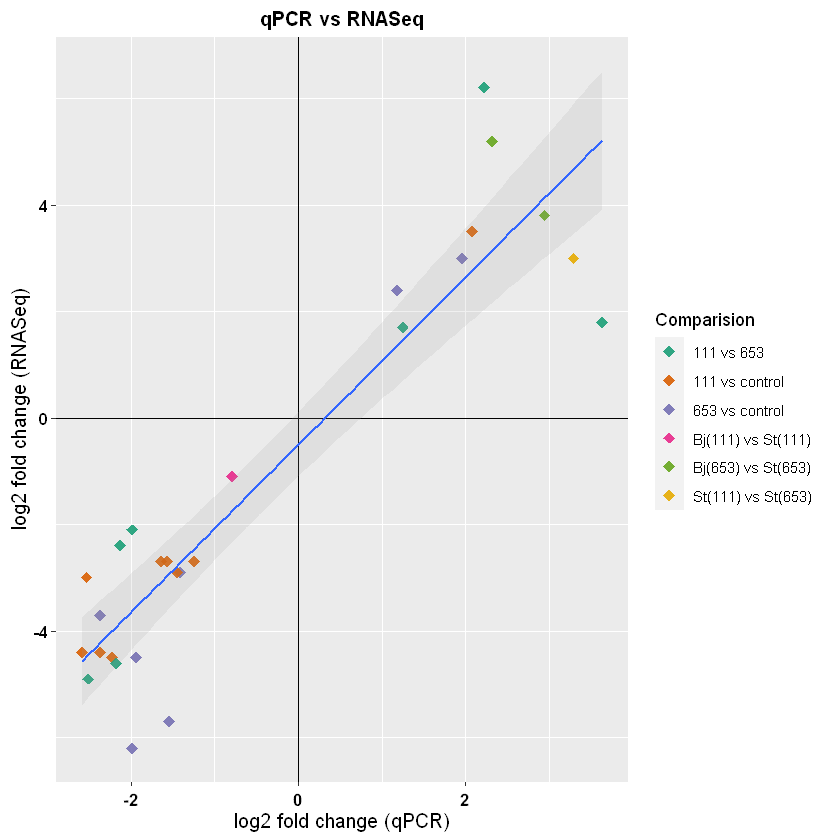

In [20]:
ggplot(df_summary, aes(x = Avg_qPCR, y = Avg_RNASeq))+
  geom_point(aes(colour = comparision), size = 3, pch =18, alpha =0.9)+
  geom_vline(xintercept = 0)+
  geom_hline(yintercept = 0)+
  geom_smooth(method = 'lm', se = T, alpha =0.15, size = 0.75)+
  scale_color_brewer (palette = 'Dark2')+
  labs(title ='qPCR vs RNASeq', x = 'log2 fold change (qPCR)', y = 'log2 fold change (RNASeq)')+
  theme_gray()+theme(panel.grid.major=element_line(colour="white"))+
  theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          plot.caption = element_text(size =10),
          axis.title.x= element_text(size =12, color ='black'),
          axis.title.y = element_text(size =12, color ='black', angle = 90),
          axis.text.x = element_text(vjust =0.5, size =10,angle =1,color = 'black', face='bold'),
          axis.text.y = element_text(size =10, color = 'black', face ='bold'))+
          guides(color = guide_legend('Comparision'))
          

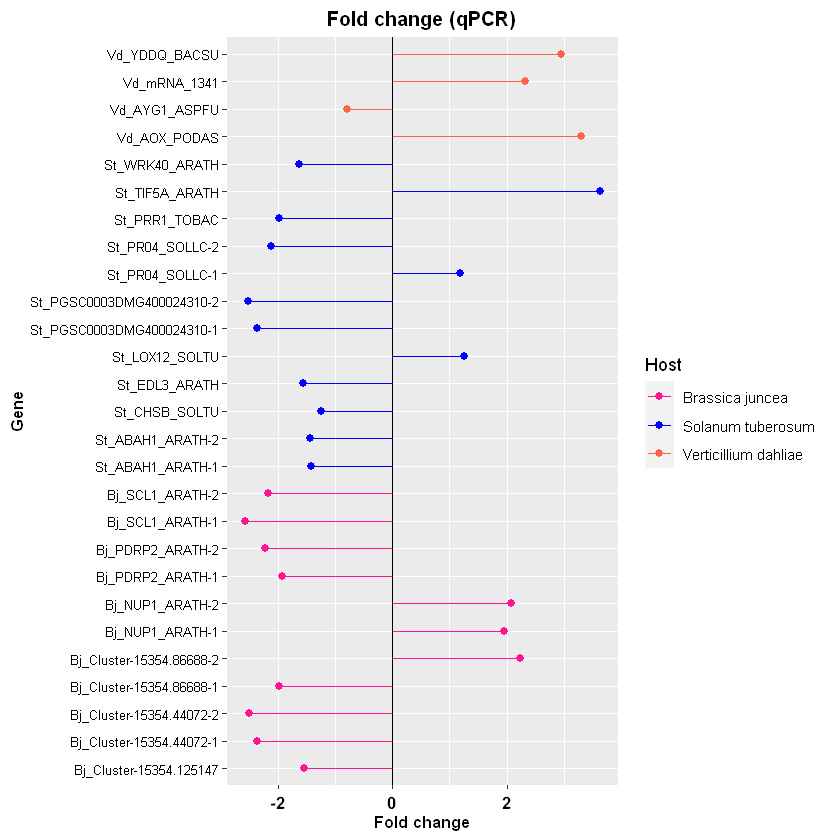

In [27]:
ggplot(df_summary, aes(x = Avg_qPCR, y = Gene, color = Host)) +
        geom_segment(aes(x = 0, y = Gene, xend = Avg_qPCR, yend = Gene)) +
        geom_point(stat='identity', fill="black", size=2)+ 
 geom_vline(xintercept = 0)+
        scale_colour_manual(values = c("deeppink", "blue", 'tomato'))+
       labs( title = "Fold change (qPCR)", x = 'Fold change', y = 'Gene')+
  theme_gray()+theme(panel.grid.major=element_line(colour="white"))+
  theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          plot.caption = element_text(size =10),
          axis.title.x= element_text(size =10, color ='black', face = 'bold'),
          axis.title.y = element_text(size =10, color ='black', angle = 90, face = 'bold'),
          axis.text.x = element_text(vjust =0.5, size =10,angle =1,color = 'black', face ='bold'),
          axis.text.y = element_text(size =8, color = 'black'))

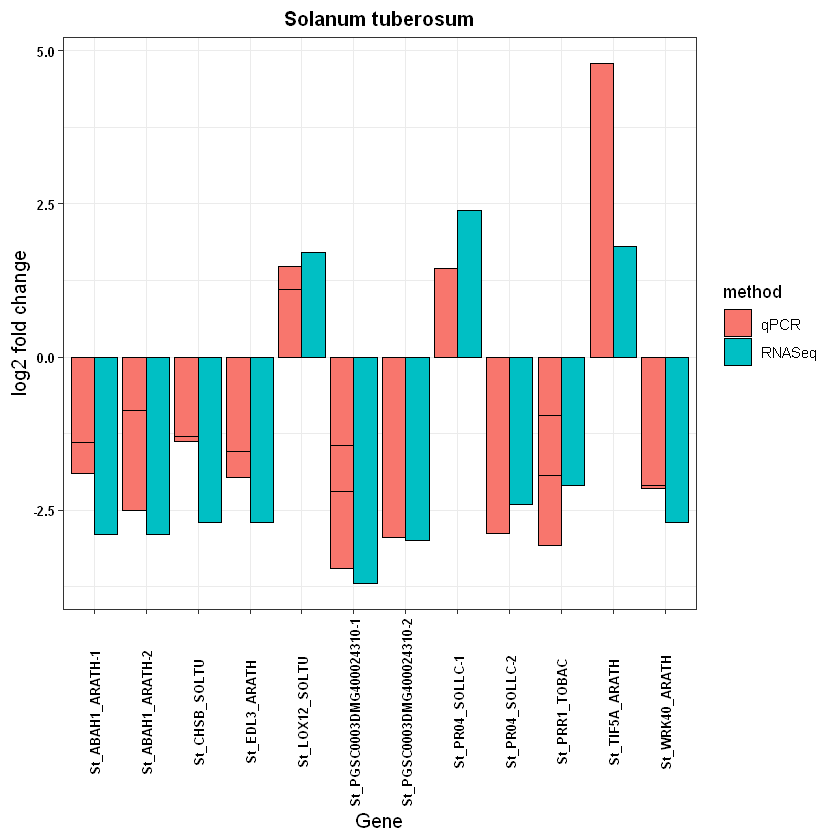

In [28]:

#png('Solanum_bar.png')
Solanum_bar = ggplot(df_St, aes(x= Gene, y= foldchange, fill = method))+
       geom_bar(stat = 'identity', position ='dodge', colour = 'black')+
       theme_bw()+
       labs(title ='Solanum tuberosum', x = 'Gene', y = 'log2 fold change')+
       theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          plot.caption = element_text(size =10),
          axis.title.x= element_text(size =12, color ='black'),
          axis.title.y = element_text(size =12, color ='black'),
          axis.text.x = element_text(vjust =0.5, size =8,angle =90,color = 'black', face='bold'),
          axis.text.y = element_text(size =8, color = 'black', face ='bold'))
Solanum_bar
#dev.off()

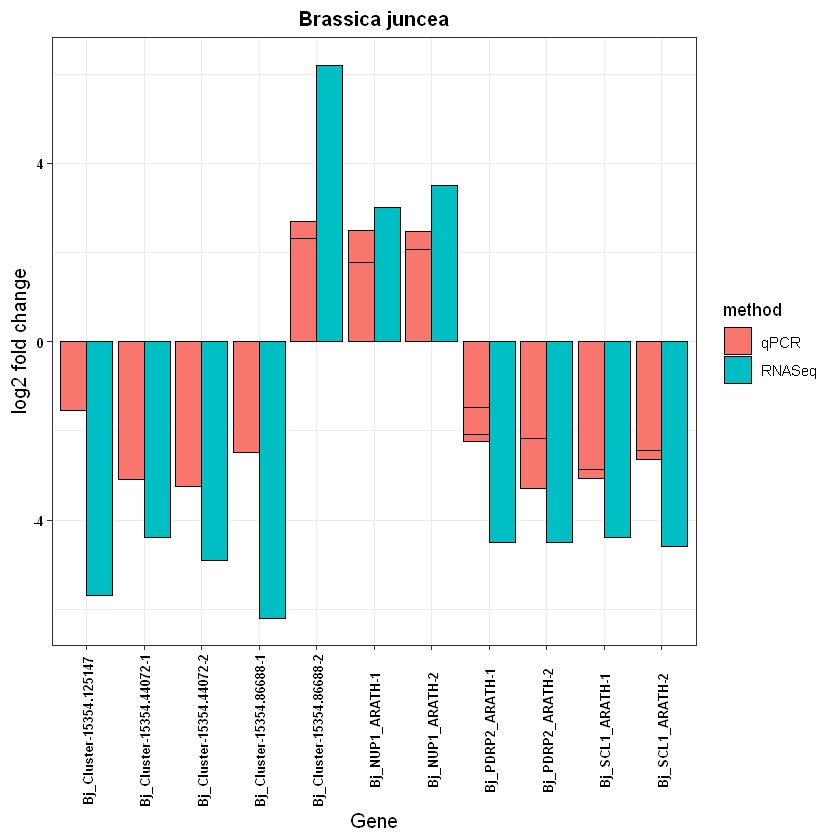

In [29]:

#png('Brassica_bar.png')
Brassica_bar = ggplot(df_Bj, aes(x= Gene, y= foldchange, fill = method))+
       geom_bar(stat = 'identity', position ='dodge', colour = 'black')+
       theme_bw()+
       labs(title ='Brassica juncea', x = 'Gene', y = 'log2 fold change')+
       theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          plot.caption = element_text(size =10),
          axis.title.x= element_text(size =12, color ='black'),
          axis.title.y = element_text(size =12, color ='black'),
          axis.text.x = element_text(vjust =0.5, size =8,angle =90,color = 'black', face='bold'),
          axis.text.y = element_text(size =8, color = 'black', face ='bold'))
Brassica_bar
#dev.off()

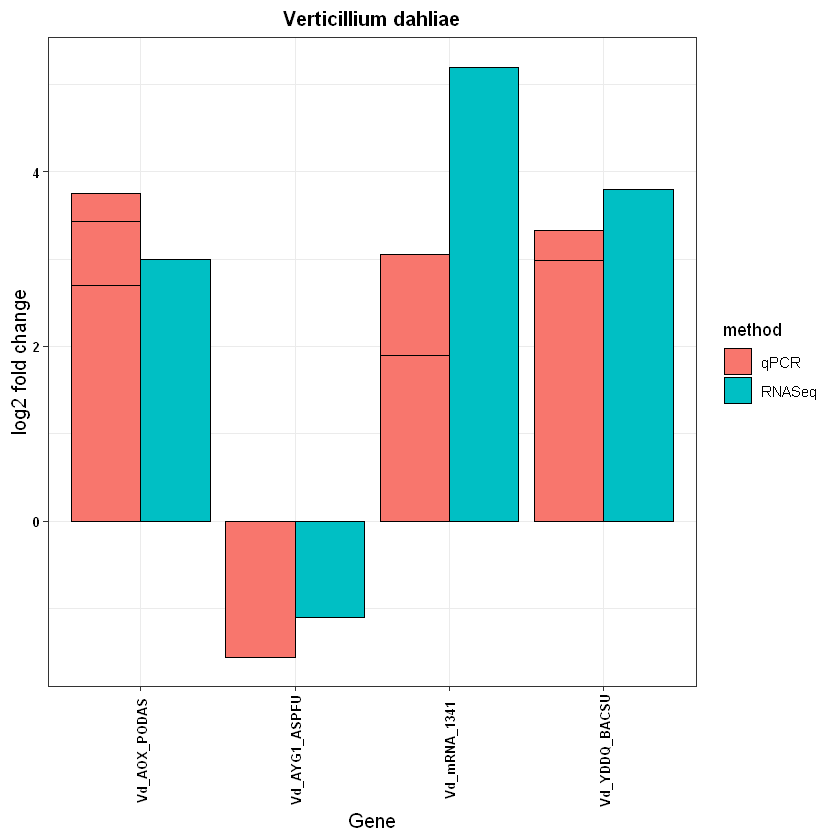

In [30]:

#png('Verticillium_bar.png')
Verticillium_bar = ggplot(df_Vd, aes(x= Gene, y= foldchange, fill = method))+
       geom_bar(stat = 'identity', position ='dodge', colour = 'black')+
       theme_bw()+
       labs(title ='Verticillium dahliae', x = 'Gene', y = 'log2 fold change')+
       theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          plot.caption = element_text(size =10),
          axis.title.x= element_text(size =12, color ='black'),
          axis.title.y = element_text(size =12, color ='black'),
          axis.text.x = element_text(vjust =0.5, size =8,angle =90,color = 'black', face='bold'),
          axis.text.y = element_text(size =8, color = 'black', face ='bold'))          
Verticillium_bar
#dev.off()

# References